In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 이름을 적절하게 변경하세요



# 제조업체명 : 삼선전자
## 제품명 : 휴대용 스마트 TV _ 기획상품
## 모델명 : SSAN-TV-4
### 총 데이터 양 : 10,000개

### 분석데이터 불러오기
 - AS_Management_Data_A.csv 데이터는 A/S 접수 항목관련 데이터이다.

  

### 컬럼명 설명
#### AS_Management_Data_A.csv
 - 접 수 번 호 : 고객 고객불만처리접수 할때 관리를 하기위한 고유번호
 - 접 수 일 자 : 최초 A/S센터에 접수하는 날자
 - 제 조 일 자 : 제품 제조 일자
 - 불량유형_대 : 불량유형 넓은 범위 분류 카테고리
 - 불량유형_중 : 불량유형 중간 범위 분류 카테고리
 - 불량유형_소 : 불량유형 세부 범위 분류 카테고리
 - 불 량 원 인 : 세부 범위 분류에 따른 불량의 원인
 - 보 증 유 무 : 품질보증기간 1년 ( 접수일자 - 제조일자 <= 365일 "무상 A/S" , 접수일자 - 제조일자 > 365일 "유상 A/S )
 - 처 리 내 역 : 품질보증기간에 따른 처리내역 ( "부품교체" . "제품교환" )
 - 수 리 부 품 : 불량원인에 따른 교체되는 부품
 - 부 품 비 용 : 수리비 청구와 관계없이 교체되는 수리부품에 대한 가격
 - 수리비 청구 : 품질보증기간이 지난 고객에게 청구할 A/S 비용 ( 데이터에는 부품의 가격만 명시되어 있음 )

In [6]:
df_a = pd.read_csv('AS_Management_Data_A.csv')


In [7]:
df_a

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구
9996,SL31556,2021-05-02,2020-05-15,외관,파손,케이스,사용자 과실,유상,부품교체,케이스,20000,20000
9997,SL31557,2023-02-12,2022-12-31,기능,버튼,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구
9998,SL31558,2022-09-10,2022-08-12,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구


### 분석데이터 불러오기
 - AS_Management_Data_B.csv 데이터는 주 불량 부품공급업체와 최종 검사자에 대한 데이터이다.

#### AS_Management_Data_B.csv
 - 접 수 번 호 : 고객 고객불만처리접수 할때 관리를 하기위한 고유번호
 - 케이스_납품업체 : 케이스를 공급하는 업체 ( "A케이스", "B사출", "C커버" ) 세개의 공급업체가 있음.
 - 액정_납품업체 : 액정을 공급하는 업체 ("A액정" , "B패널", "C코닝" ) 세개의 공급업체가 있음.
 - 컨넥터_납품업체 : 컨넥터를 공급하는 업체 ( "A케이블", "B통신", "C텍" ) 세개의 공급업체가 있음.
 - M_Pcb_납품업체 : Main Pcb Board 공급업체 ( "A테크", "B테크", "C테크놀러지" ) 세개의 공급업체가 있음.  
 - SW_PCB_납품업체 : Switch Pcb Board 공급업체 ( "A테크", "B테크", "C테크놀러지" ) 세개의 공급업체가 있음.  
 - SMPS_Pcb_납품업체 : Smps Pcb Board 공급업체 ( "A테크", "B테크", "C테크놀러지" ) Q.C담당
 - Fuse_납품업체 : 퓨즈 공급업체 ( "A상사", "B파츠" ) 두개의 공급업체가 있음.
 - Battery_납품업체 : 배터리 공급업체 ( "A리튬", "B전지", "C파워" ) 세개의 공급업체가 있음. 
 - Q.C담당 : 제품 검사원 ( "김민지", "이수현" ) 세명의 검사원이 제품 검사를 한다.

In [8]:
df_b = pd.read_csv('AS_Management_Data_B.csv')

In [9]:
df_b

,접수번호,수리부품,부품공급업체,Q.C담당
0,SL21560,액정 Ass'y,B패널,이수현
1,SL21561,케이스,A케이스,이수현
2,SL21562,액정 Ass'y,C코닝,김민지
3,SL21563,액정 Ass'y,C코닝,김민지
4,SL21564,액정 Ass'y,C코닝,김민지
...,...,...,...,...
9995,SL31555,SMPS Pcb Board,A테크,김민지
9996,SL31556,케이스,A케이스,이수현
9997,SL31557,스위치 PCB Board Ass'y,B텍,이수현
9998,SL31558,액정 Ass'y,C코닝,김민지


### 결측치 확인하기

In [10]:
df_a.isna().sum()

접수번호        0
접수날짜        0
제조일자        0
불량유형_대      0
불량유형_중      0
불량유형_소      0
원인          0
유상/무상       0
처리내역        0
수리부품        0
수리비용        0
수리비용청구여부    0
dtype: int64

In [11]:
df_b.isna().sum()

접수번호      0
수리부품      0
부품공급업체    0
Q.C담당     0
dtype: int64

## df_a 데이터 분석하기

#### 제조년별 불량수량 보기

In [12]:
# 날짜가 뒤죽박죽이니까, 날짜로 정렬
df_a.sort_values('접수번호', inplace= True)

In [13]:
df_a

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구
9996,SL31556,2021-05-02,2020-05-15,외관,파손,케이스,사용자 과실,유상,부품교체,케이스,20000,20000
9997,SL31557,2023-02-12,2022-12-31,기능,버튼,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구
9998,SL31558,2022-09-10,2022-08-12,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구


- 제조년도 컬럼 만들기

In [14]:
# 년도 추출하여 새로운 컬럼 추가 1
pd.to_datetime(df_a['제조일자']).dt.year

0       2022
1       2022
2       2021
3       2021
4       2021
        ... 
9995    2022
9996    2020
9997    2022
9998    2022
9999    2021
Name: 제조일자, Length: 10000, dtype: int64

In [15]:
# 년도 추출하여 새로운 컬럼 추가 2
df_a["제조년"] = pd.to_datetime(df_a['제조일자']).dt.year

In [16]:
# 데이터프레임 확인하기
df_a.head(3)

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021


In [17]:
# 제조년별 a/s접수 수량 보기
df_a['제조년'].value_counts().sort_index()


2020    1339
2021    4285
2022    3704
2023     672
Name: 제조년, dtype: int64

In [18]:
# 체크박스로 표시할 년도 목록 생성
제조_years_list = df_a['제조년'].unique()

In [19]:
# 체크박스로 표시할 년도 목록 정렬
제조_years_list = sorted(제조_years_list, reverse=False)

In [20]:
df_a.loc[df_a['제조년'] == 2021]



,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021
7,SL21567,2021-10-11,2021-01-15,기능,화면,백화현상,컨넥터 접촉불량,무상,제품교환,컨넥터 Ass'y,18000,미청구,2021
8,SL21568,2022-01-06,2021-04-13,기능,화면,백화현상,컨넥터 접촉불량,무상,부품교체,컨넥터 Ass'y,18000,미청구,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,SL31546,2021-09-11,2021-07-16,기능,화면,백화현상,액정 고장,무상,부품교체,액정 Ass'y,80000,미청구,2021
9991,SL31551,2022-02-10,2021-05-01,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2021
9993,SL31553,2022-06-28,2021-06-21,기능,화면,백화현상,컨넥터 접촉불량,유상,부품교체,컨넥터 Ass'y,18000,18000,2021
9994,SL31554,2022-02-05,2021-12-05,기능,화면,백화현상,컨넥터 접촉불량,무상,제품교환,컨넥터 Ass'y,18000,미청구,2021


<Axes: xlabel='제조년', ylabel='count'>

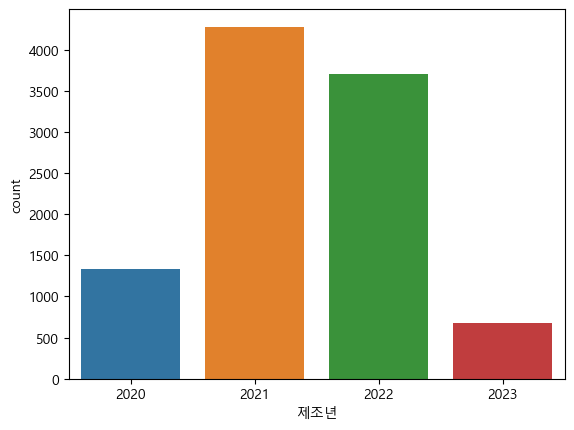

In [21]:
import seaborn as sns
sns.countplot(data = df_a , x = '제조년')

<function matplotlib.pyplot.show(close=None, block=None)>

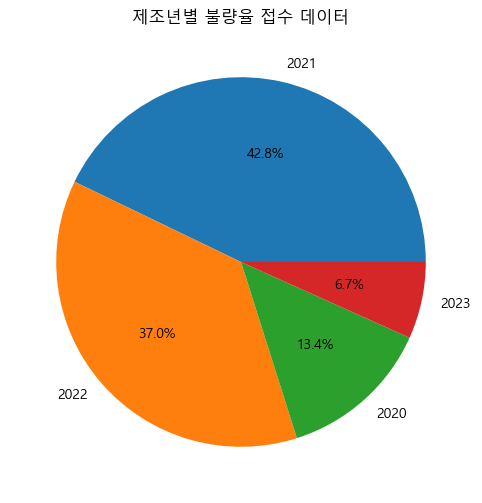

In [22]:
# 제조년도별 점유율 계산
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
제조년_counts = df_a['제조년'].value_counts()
labels = 제조년_counts.index.tolist()
sizes = 제조년_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('제조년별 불량율 접수 데이터')
plt.show



#### 접수년별 불량수량 보기

In [23]:
# 년도 추출하여 새로운 컬럼 추가 1
pd.to_datetime(df_a['접수날짜']).dt.year

0       2022
1       2022
2       2022
3       2021
4       2022
        ... 
9995    2022
9996    2021
9997    2023
9998    2022
9999    2022
Name: 접수날짜, Length: 10000, dtype: int64

In [24]:
# 년도 추출하여 새로운 컬럼 추가 2
df_a["접수년"] = pd.to_datetime(df_a['접수날짜']).dt.year

In [25]:
df_a.head(3)

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022


In [26]:
# 체크박스로 표시할 년도 목록 생성
접수_years_list = df_a['접수년'].unique()
접수_years_list = sorted(접수_years_list, reverse=False)

In [27]:
df_a.loc[df_a['접수년'] == 2022]  # 2022 대신 "접수_years_list" 사용 (앱대시보드에 사용시)

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022
8,SL21568,2022-01-06,2021-04-13,기능,화면,백화현상,컨넥터 접촉불량,무상,부품교체,컨넥터 Ass'y,18000,미청구,2021,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,SL31553,2022-06-28,2021-06-21,기능,화면,백화현상,컨넥터 접촉불량,유상,부품교체,컨넥터 Ass'y,18000,18000,2021,2022
9994,SL31554,2022-02-05,2021-12-05,기능,화면,백화현상,컨넥터 접촉불량,무상,제품교환,컨넥터 Ass'y,18000,미청구,2021,2022
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2022,2022
9998,SL31558,2022-09-10,2022-08-12,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022


In [28]:
# 접수년별 a/s접수 수량 보기
df_a['접수년'].value_counts().sort_index()


2021    3149
2022    4868
2023    1983
Name: 접수년, dtype: int64

<Axes: xlabel='접수년', ylabel='count'>

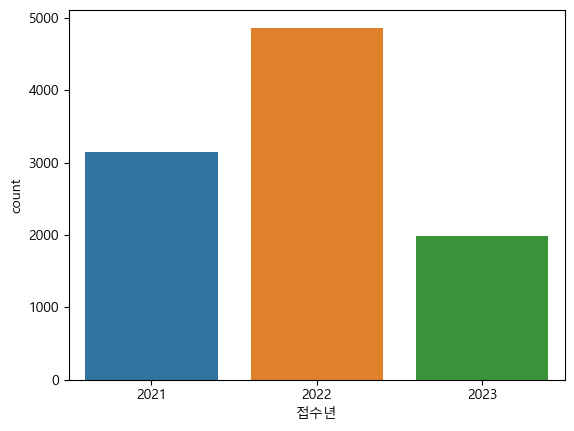

In [29]:
sns.countplot(data = df_a , x = '접수년')


<function matplotlib.pyplot.show(close=None, block=None)>

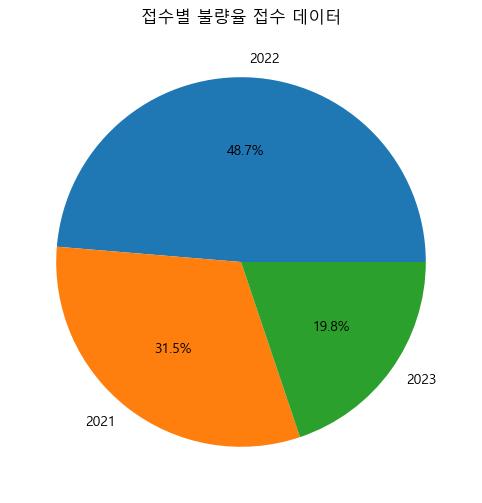

In [30]:
# 접수년도별 점유율 계산
접수년_counts = df_a['접수년'].value_counts()
plt.figure(figsize=(10,6))
labels = 접수년_counts.index.tolist()
sizes = 접수년_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('접수별 불량율 접수 데이터')
plt.show

#### 불량유형_대 별 불량수량 보기

In [31]:
df_a.head(3)

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022


In [32]:
df_a['불량유형_대'].nunique()

2

In [33]:
df_a['불량유형_대'].value_counts()

외관    5012
기능    4988
Name: 불량유형_대, dtype: int64

In [34]:
df_a['불량유형_대'] == "기능"

0       False
1       False
2       False
3       False
4        True
        ...  
9995     True
9996    False
9997     True
9998    False
9999     True
Name: 불량유형_대, Length: 10000, dtype: bool

In [35]:
df_a['불량유형_대'].unique()

array(['외관', '기능'], dtype=object)

In [36]:
df_a.loc[df_a['불량유형_대'] == "기능"]

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022
6,SL21566,2023-04-07,2022-04-16,기능,전원,켜지지 않음,휴즈 끊어짐,무상,부품교체,Fuse,3000,미청구,2022,2023
7,SL21567,2021-10-11,2021-01-15,기능,화면,백화현상,컨넥터 접촉불량,무상,제품교환,컨넥터 Ass'y,18000,미청구,2021,2021
8,SL21568,2022-01-06,2021-04-13,기능,화면,백화현상,컨넥터 접촉불량,무상,부품교체,컨넥터 Ass'y,18000,미청구,2021,2022
11,SL21571,2021-10-27,2021-03-20,기능,버튼,두번 터치됨,Pcb Board 고장,무상,제품교환,MAIN Pcb Board,50000,미청구,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,SL31553,2022-06-28,2021-06-21,기능,화면,백화현상,컨넥터 접촉불량,유상,부품교체,컨넥터 Ass'y,18000,18000,2021,2022
9994,SL31554,2022-02-05,2021-12-05,기능,화면,백화현상,컨넥터 접촉불량,무상,제품교환,컨넥터 Ass'y,18000,미청구,2021,2022
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2022,2022
9997,SL31557,2023-02-12,2022-12-31,기능,버튼,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2022,2023


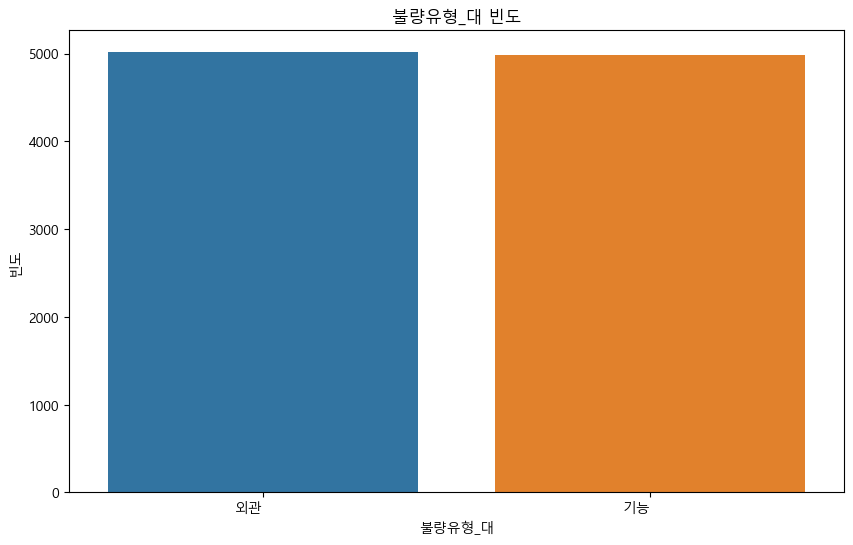

In [37]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
대 = sns.countplot(data=df_a,x='불량유형_대')

# x축 레이블 45도 회전
대.set_xticklabels(대.get_xticklabels(), rotation=0, ha='right')

# x축, y축 레이블 설정
plt.xlabel("불량유형_대")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량유형_대 빈도")

# 그래프 보여주기
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

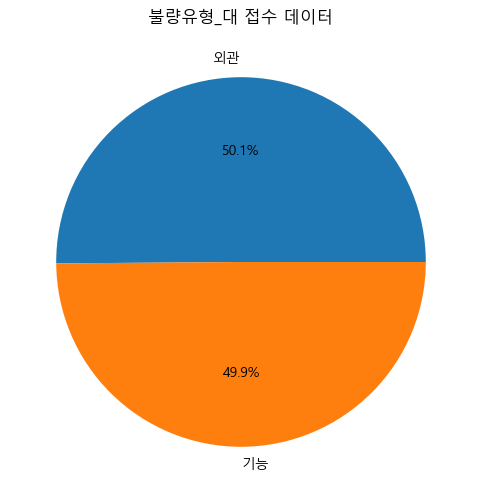

In [38]:
# 접수년도별 점유율 계산
plt.figure(figsize=(10,6))
불량유형_대_counts = df_a['불량유형_대'].value_counts()
labels = 불량유형_대_counts.index.tolist()
sizes = 불량유형_대_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('불량유형_대 접수 데이터')
plt.show

#### 불량유형_중 별 불량수량 보기

In [39]:
df_a['불량유형_중'].nunique()

6

In [40]:
df_a['불량유형_중'].value_counts()

화면    1730
흠집    1693
오염    1660
파손    1659
전원    1650
버튼    1608
Name: 불량유형_중, dtype: int64

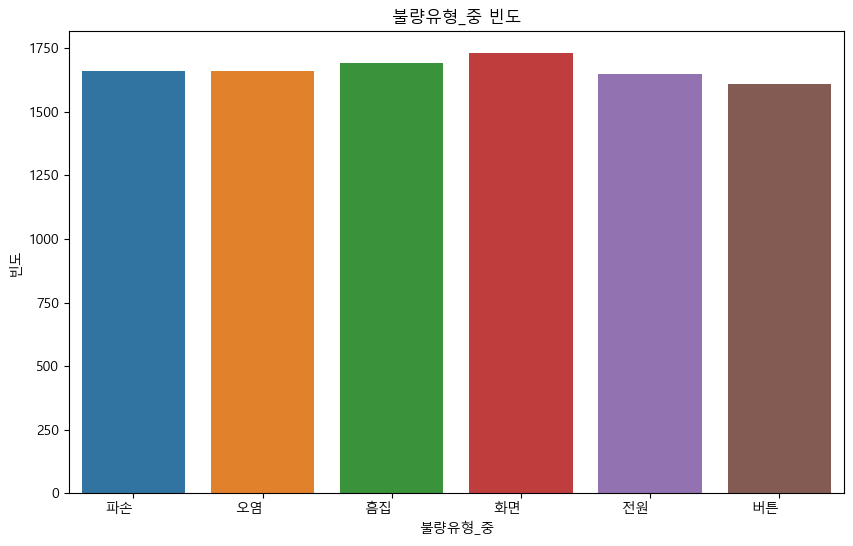

In [41]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
중 = sns.countplot(data=df_a,x='불량유형_중')

# x축 레이블 45도 회전
중.set_xticklabels(중.get_xticklabels(), rotation=0, ha='right')

# x축, y축 레이블 설정
plt.xlabel("불량유형_중")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량유형_중 빈도")

# 그래프 보여주기
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

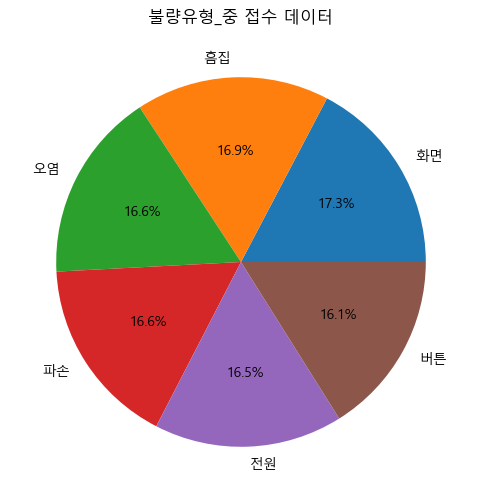

In [42]:
# 접수년도별 점유율 계산
불량유형_중_counts = df_a['불량유형_중'].value_counts()
plt.figure(figsize=(10, 6))
labels = 불량유형_중_counts.index.tolist()
sizes = 불량유형_중_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('불량유형_중 접수 데이터')
plt.show

#### 불량유형_소 별 불량수량 보기

In [43]:
df_a.head(3)

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022


In [44]:
df_a['불량유형_소'].nunique()

7

In [45]:
df_a['불량유형_소'].value_counts()

액정        2519
케이스       2493
켜지지 않음    1650
백화현상       887
안켜짐        843
두번 터치됨     813
동작안함       795
Name: 불량유형_소, dtype: int64

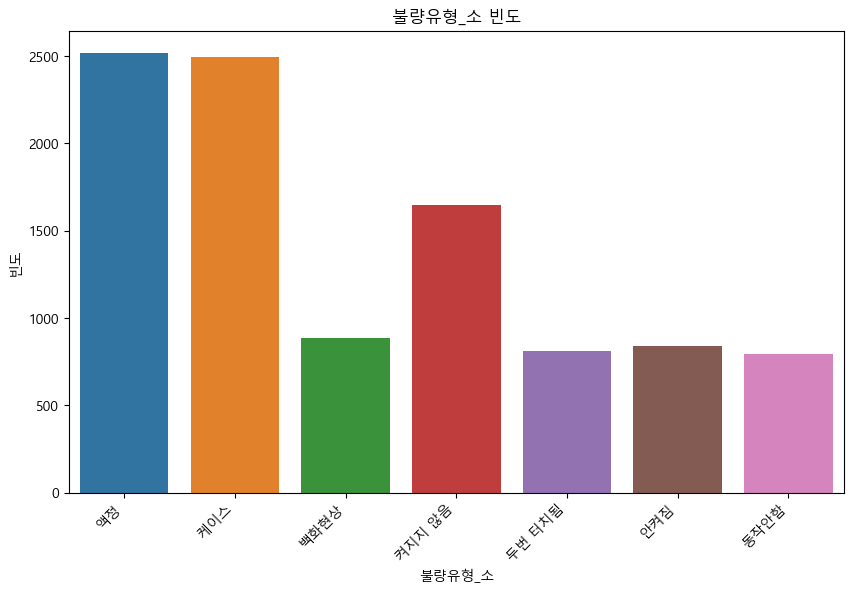

In [46]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
소 = sns.countplot(data=df_a,x='불량유형_소')

# x축 레이블 45도 회전
소.set_xticklabels(소.get_xticklabels(), rotation=45, ha='right')

# x축, y축 레이블 설정
plt.xlabel("불량유형_소")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량유형_소 빈도")

# 그래프 보여주기
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

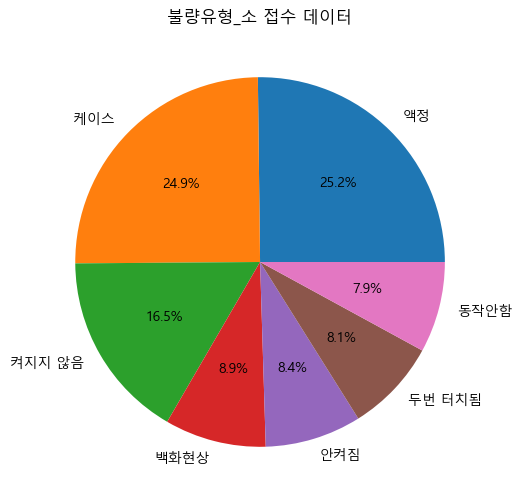

In [47]:
# 접수년도별 점유율 계산
불량유형_소_counts = df_a['불량유형_소'].value_counts()
plt.figure(figsize=(10, 6))
labels = 불량유형_소_counts.index.tolist()
sizes = 불량유형_소_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('불량유형_소 접수 데이터')
plt.show

#### 불량유형_소 별 불량수량 보기

In [48]:
df_a.head(3)

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022


In [49]:
df_a['원인'].nunique()

10

In [50]:
df_a['원인'].value_counts()

검수미비            2542
사용자 과실          2470
Pcb Board 고장    1807
스위치고장            801
액정 고장            568
전원스위치 고장         430
휴즈 끊어짐           406
배터리 방전           394
컨넥터 접촉불량         300
컨넥터 이탈           282
Name: 원인, dtype: int64

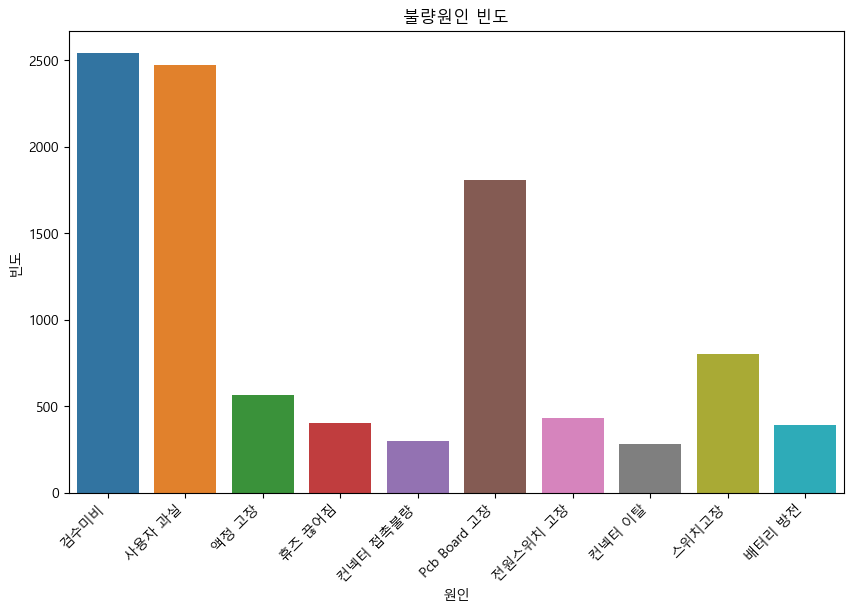

In [51]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
원인 = sns.countplot(data=df_a, x="원인")

# x축 레이블 45도 회전
원인.set_xticklabels(원인.get_xticklabels(), rotation=45, ha='right')

# x축, y축 레이블 설정
plt.xlabel("원인")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량원인 빈도")

# 그래프 보여주기
plt.show()


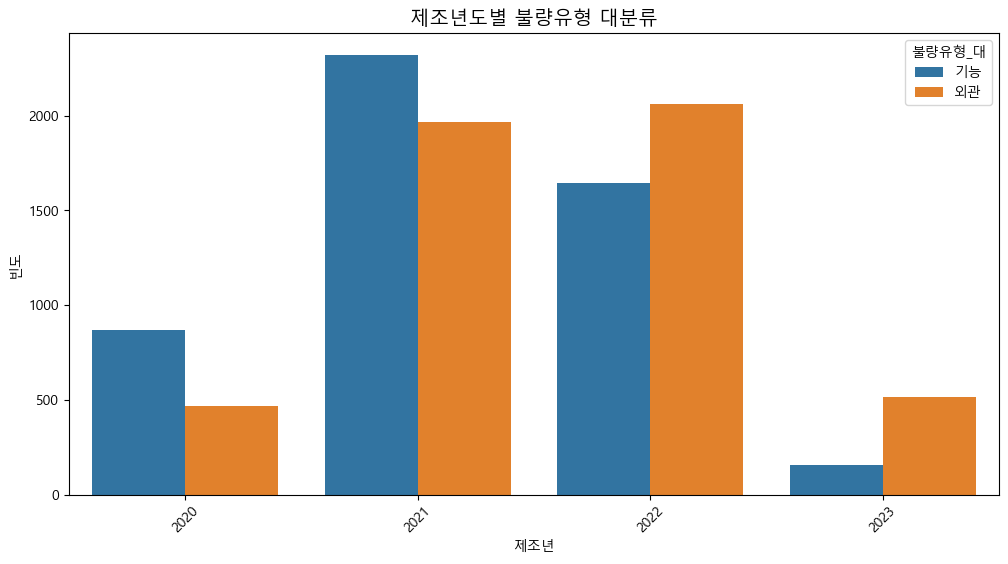

In [52]:
#제조년도별 불량유형 대분류
df_grouped = df_a.groupby(['제조년', '불량유형_대']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='불량유형_대')

# 그래프 제목 설정
plt.title('제조년도별 불량유형 대분류', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

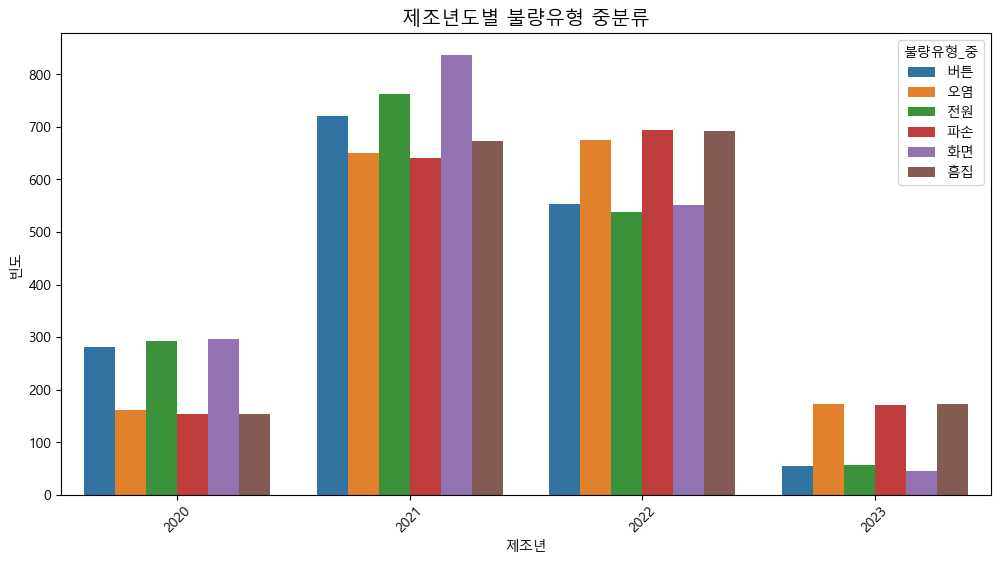

In [53]:
#제조년도별 불량유형 소분류
df_grouped = df_a.groupby(['제조년', '불량유형_중']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='불량유형_중')

# 그래프 제목 설정
plt.title('제조년도별 불량유형 중분류', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()


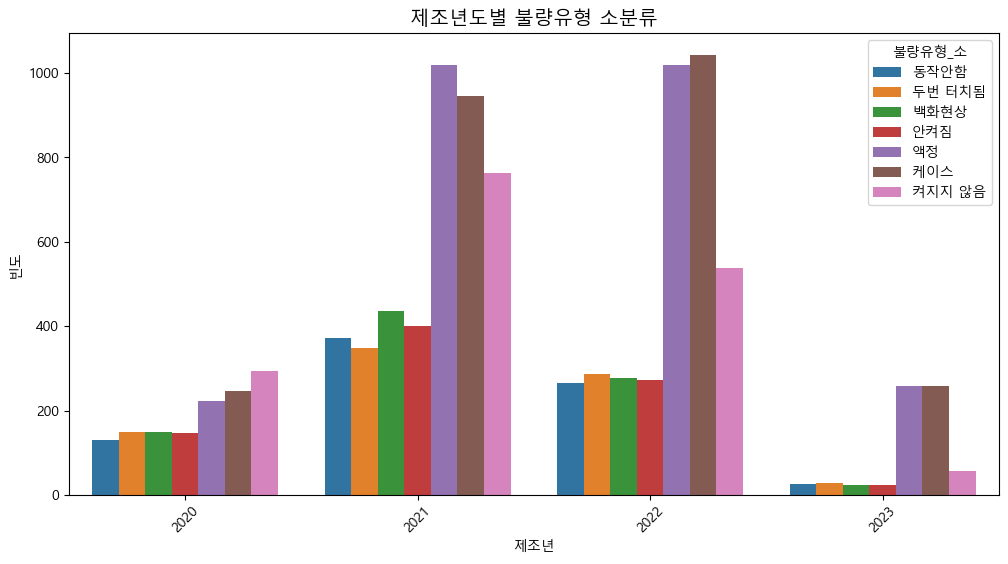

In [54]:
#제조년도별 불량유형 소분류
df_grouped = df_a.groupby(['제조년', '불량유형_소']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='불량유형_소')

# 그래프 제목 설정
plt.title('제조년도별 불량유형 소분류', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()


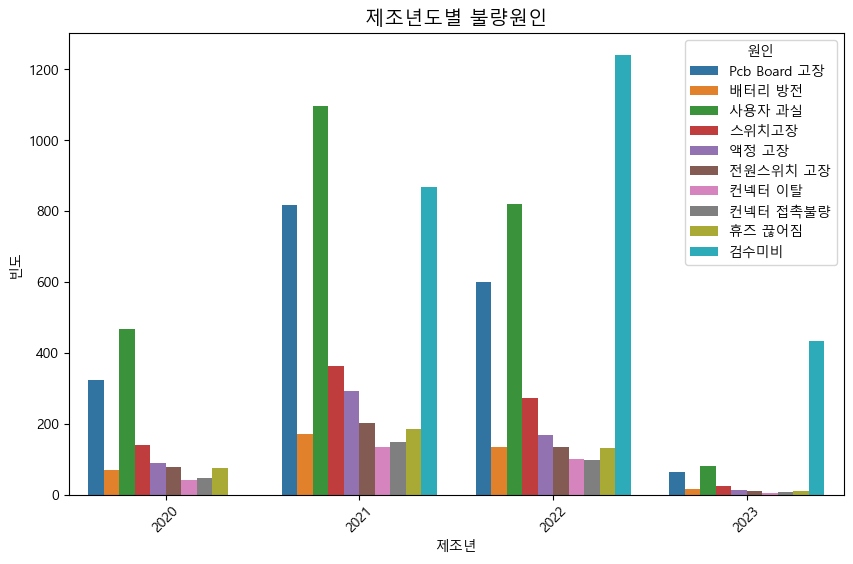

In [55]:
#제조년도별 불량원인
df_grouped = df_a.groupby(['제조년', '원인']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(10,6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='원인')

# 그래프 제목 설정
plt.title('제조년도별 불량원인', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

In [56]:
df_a.head(3)

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022


In [57]:
df_a['제조년'] == 2021

0       False
1       False
2        True
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999     True
Name: 제조년, Length: 10000, dtype: bool

In [58]:
df_제조년 = df_a.loc[df_a['제조년'] == 2021]

In [59]:
df_제조년

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2021
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022
7,SL21567,2021-10-11,2021-01-15,기능,화면,백화현상,컨넥터 접촉불량,무상,제품교환,컨넥터 Ass'y,18000,미청구,2021,2021
8,SL21568,2022-01-06,2021-04-13,기능,화면,백화현상,컨넥터 접촉불량,무상,부품교체,컨넥터 Ass'y,18000,미청구,2021,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,SL31546,2021-09-11,2021-07-16,기능,화면,백화현상,액정 고장,무상,부품교체,액정 Ass'y,80000,미청구,2021,2021
9991,SL31551,2022-02-10,2021-05-01,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2021,2022
9993,SL31553,2022-06-28,2021-06-21,기능,화면,백화현상,컨넥터 접촉불량,유상,부품교체,컨넥터 Ass'y,18000,18000,2021,2022
9994,SL31554,2022-02-05,2021-12-05,기능,화면,백화현상,컨넥터 접촉불량,무상,제품교환,컨넥터 Ass'y,18000,미청구,2021,2022


In [60]:
df_검수미비 = df_제조년.loc[df_제조년['원인'] == '검수미비']

In [61]:
df_검수미비

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
26,SL21586,2021-05-02,2021-04-24,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
33,SL21593,2021-08-17,2021-07-18,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021,2021
43,SL21603,2022-01-10,2021-12-15,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2022
44,SL21604,2021-11-10,2021-11-04,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021,2021
68,SL21628,2022-01-03,2021-12-23,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,SL31490,2021-11-04,2021-10-21,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021,2021
9937,SL31497,2021-09-13,2021-08-20,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
9958,SL31518,2021-05-19,2021-05-11,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
9966,SL31526,2021-10-02,2021-09-26,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021


In [62]:
df_a.to_csv('df_year.csv')

In [63]:
df_year = pd.read_csv('df_year.csv',index_col=0)

In [64]:
df_year

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,제조년,접수년
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2021
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2022,2022
9996,SL31556,2021-05-02,2020-05-15,외관,파손,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2020,2021
9997,SL31557,2023-02-12,2022-12-31,기능,버튼,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2022,2023
9998,SL31558,2022-09-10,2022-08-12,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022


In [65]:
df_b = pd.read_csv('AS_Management_Data_B.csv')

In [66]:
df_b

,접수번호,수리부품,부품공급업체,Q.C담당
0,SL21560,액정 Ass'y,B패널,이수현
1,SL21561,케이스,A케이스,이수현
2,SL21562,액정 Ass'y,C코닝,김민지
3,SL21563,액정 Ass'y,C코닝,김민지
4,SL21564,액정 Ass'y,C코닝,김민지
...,...,...,...,...
9995,SL31555,SMPS Pcb Board,A테크,김민지
9996,SL31556,케이스,A케이스,이수현
9997,SL31557,스위치 PCB Board Ass'y,B텍,이수현
9998,SL31558,액정 Ass'y,C코닝,김민지


In [67]:
df_total = pd.merge(df_year, df_b, on = '접수번호', how='left')

In [68]:
df_total

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품_x,수리비용,수리비용청구여부,제조년,접수년,수리부품_y,부품공급업체,Q.C담당
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,B패널,이수현
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022,케이스,A케이스,이수현
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022,액정 Ass'y,C코닝,김민지
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2021,액정 Ass'y,C코닝,김민지
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022,액정 Ass'y,C코닝,김민지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2022,2022,SMPS Pcb Board,A테크,김민지
9996,SL31556,2021-05-02,2020-05-15,외관,파손,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2020,2021,케이스,A케이스,이수현
9997,SL31557,2023-02-12,2022-12-31,기능,버튼,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2022,2023,스위치 PCB Board Ass'y,B텍,이수현
9998,SL31558,2022-09-10,2022-08-12,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,C코닝,김민지


In [69]:
df_total.to_csv('df_total.csv', index=False)


In [70]:
df_total = pd.read_csv('df_total.csv')

In [71]:
df_total['수리부품_x'].unique()

array(["액정 Ass'y", '케이스', 'Fuse', "컨넥터 Ass'y", 'MAIN Pcb Board',
       'SMPS Pcb Board', "스위치 PCB Board Ass'y", 'Battery'], dtype=object)

In [72]:
df_total['부품공급업체'].unique()

array([' B패널 ', ' A케이스 ', ' C코닝 ', ' A액정 ', ' A상사 ', ' A케이블 ', ' B사출 ',
       ' B텍 ', ' C테크놀러지 ', ' C커버 ', ' A테크 ', ' C텍 ', ' B통신 ', ' C파워 ',
       ' B파츠 ', ' B전지 ', ' A리튬 '], dtype=object)

In [73]:
# df_total 데이터프레임의 수리부품과 부품공급업체 컬럼 가져오기
수리부품 = df_total['수리부품_x']
부품공급업체 = df_total['부품공급업체']

# 수리부품에 해당하는 부품공급업체들을 그룹화하여 출력
grouped = df_total.groupby(수리부품)['부품공급업체'].unique().reset_index()
grouped.columns = ['수리부품', '부품공급업체']

In [74]:
grouped

,수리부품,부품공급업체
0,Battery,"[ C파워 , B전지 , A리튬 ]"
1,Fuse,"[ A상사 , B파츠 ]"
2,MAIN Pcb Board,"[ B텍 , C테크놀러지 , A테크 ]"
3,SMPS Pcb Board,"[ B텍 , A테크 , C테크놀러지 ]"
4,스위치 PCB Board Ass'y,"[ A테크 , C테크놀러지 , B텍 ]"
5,액정 Ass'y,"[ B패널 , C코닝 , A액정 ]"
6,컨넥터 Ass'y,"[ A케이블 , C텍 , B통신 ]"
7,케이스,"[ A케이스 , B사출 , C커버 ]"


In [75]:
# df_year 데이터프레임의 수리부품과 부품공급업체 컬럼 가져오기
수리부품 = df_total['수리부품_x']
부품공급업체 = df_total['부품공급업체']

# 수리부품에 해당하는 부품공급업체들을 그룹화하여 출력
grouped = df_total.groupby(수리부품)['부품공급업체'].unique().reset_index()
grouped.columns = ['수리부품_x', '부품공급업체들']

# A에 해당하는 부품공급업체 그룹화
grouped_Battery = df_total[df_total['수리부품_x'] == 'Battery'].groupby('부품공급업체').size()

# 결과 출력

print(grouped)
print(grouped_Battery)

                수리부품_x                  부품공급업체들
0              Battery    [ C파워 ,  B전지 ,  A리튬 ]
1                 Fuse           [ A상사 ,  B파츠 ]
2       MAIN Pcb Board  [ B텍 ,  C테크놀러지 ,  A테크 ]
3       SMPS Pcb Board  [ B텍 ,  A테크 ,  C테크놀러지 ]
4  스위치 PCB Board Ass'y  [ A테크 ,  C테크놀러지 ,  B텍 ]
5             액정 Ass'y    [ B패널 ,  C코닝 ,  A액정 ]
6            컨넥터 Ass'y    [ A케이블 ,  C텍 ,  B통신 ]
7                  케이스   [ A케이스 ,  B사출 ,  C커버 ]
부품공급업체
 A리튬      73
 B전지      96
 C파워     225
dtype: int64


In [76]:
df_total

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품_x,수리비용,수리비용청구여부,제조년,접수년,수리부품_y,부품공급업체,Q.C담당
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,B패널,이수현
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022,케이스,A케이스,이수현
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022,액정 Ass'y,C코닝,김민지
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2021,액정 Ass'y,C코닝,김민지
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022,액정 Ass'y,C코닝,김민지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2022,2022,SMPS Pcb Board,A테크,김민지
9996,SL31556,2021-05-02,2020-05-15,외관,파손,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2020,2021,케이스,A케이스,이수현
9997,SL31557,2023-02-12,2022-12-31,기능,버튼,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2022,2023,스위치 PCB Board Ass'y,B텍,이수현
9998,SL31558,2022-09-10,2022-08-12,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,C코닝,김민지


In [77]:
# 원인 컬럼이 '검수미비'인 데이터 필터링
df_total['원인'] == '검수미비'

0        True
1        True
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Name: 원인, Length: 10000, dtype: bool

In [78]:
# 원인 컬럼이 '검수미비'인 데이터 필터링
df_total[df_total['원인'] == '검수미비']


,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품_x,수리비용,수리비용청구여부,제조년,접수년,수리부품_y,부품공급업체,Q.C담당
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,B패널,이수현
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022,케이스,A케이스,이수현
5,SL21565,2023-04-12,2023-04-08,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2023,2023,액정 Ass'y,A액정,김민지
9,SL21569,2022-03-24,2022-02-23,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,B패널,김민지
13,SL21573,2022-06-03,2022-05-17,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,C코닝,이수현
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,SL31544,2022-12-17,2022-12-08,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,B패널,김민지
9985,SL31545,2022-09-10,2022-08-14,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,A액정,이수현
9988,SL31548,2023-04-16,2023-04-09,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2023,2023,케이스,B사출,이수현
9990,SL31550,2022-09-30,2022-09-27,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,C코닝,이수현


In [79]:
검수미비_df = df_total[df_total['원인'] == '검수미비']

In [80]:
검수미비_df['불량유형_소'].value_counts()

액정     1284
케이스    1258
Name: 불량유형_소, dtype: int64

In [81]:
검수미비_df['Q.C담당'].value_counts()

 김민지     1507
 이수현     1035
Name: Q.C담당, dtype: int64

In [82]:

qc_counts = 검수미비_df['Q.C담당'].value_counts()

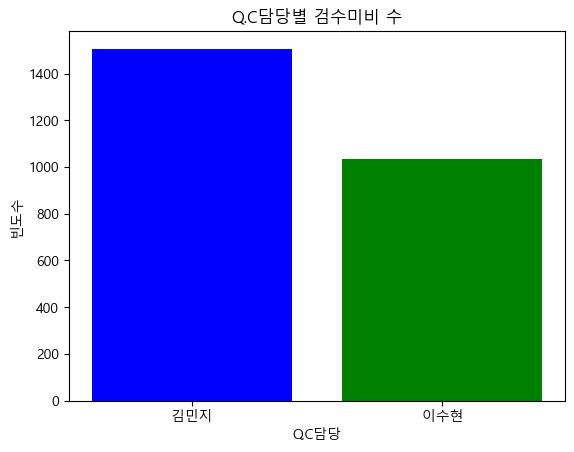

In [83]:
colors = ['blue', 'green']  # 각 바의 색상을 지정합니다.

plt.bar(qc_counts.index, qc_counts.values, color=colors)

plt.xlabel('Q.C담당')
plt.ylabel('빈도수')
plt.title('Q.C담당별 검수미비 수')
plt.show()

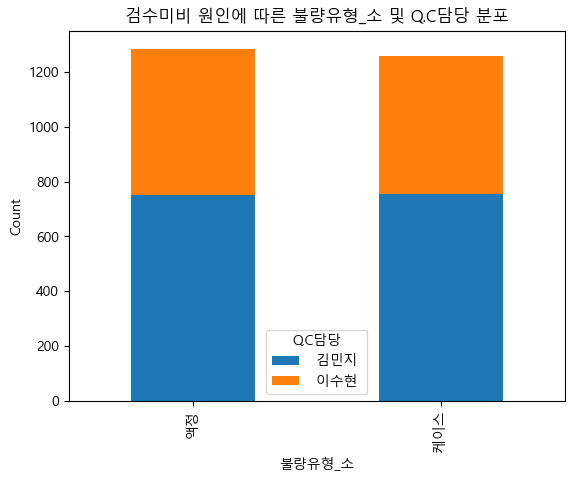

In [84]:
검수미비_df = df_total[df_total['원인'] == '검수미비']
불량유형_소_counts = 검수미비_df.groupby(['불량유형_소', 'Q.C담당']).size().unstack()

불량유형_소_counts.plot(kind='bar', stacked=True)
plt.xlabel('불량유형_소')
plt.ylabel('Count')
plt.title('검수미비 원인에 따른 불량유형_소 및 Q.C담당 분포')
plt.legend(title='Q.C담당')
plt.show()

In [85]:
df_total

,접수번호,접수날짜,제조일자,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품_x,수리비용,수리비용청구여부,제조년,접수년,수리부품_y,부품공급업체,Q.C담당
0,SL21560,2022-05-07,2022-05-01,외관,파손,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,B패널,이수현
1,SL21561,2022-07-17,2022-07-05,외관,오염,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022,케이스,A케이스,이수현
2,SL21562,2022-08-12,2021-12-06,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022,액정 Ass'y,C코닝,김민지
3,SL21563,2021-08-21,2021-01-06,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2021,액정 Ass'y,C코닝,김민지
4,SL21564,2022-08-29,2021-11-21,기능,화면,백화현상,액정 고장,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022,액정 Ass'y,C코닝,김민지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2022-09-01,2022-04-11,기능,전원,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2022,2022,SMPS Pcb Board,A테크,김민지
9996,SL31556,2021-05-02,2020-05-15,외관,파손,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2020,2021,케이스,A케이스,이수현
9997,SL31557,2023-02-12,2022-12-31,기능,버튼,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2022,2023,스위치 PCB Board Ass'y,B텍,이수현
9998,SL31558,2022-09-10,2022-08-12,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2022,2022,액정 Ass'y,C코닝,김민지


In [88]:
df_total['유상/무상'].value_counts()

무상    6331
유상    3669
Name: 유상/무상, dtype: int64

In [89]:
warranty = df_total['유상/무상'].value_counts()

In [91]:
warranty

무상    6331
유상    3669
Name: 유상/무상, dtype: int64

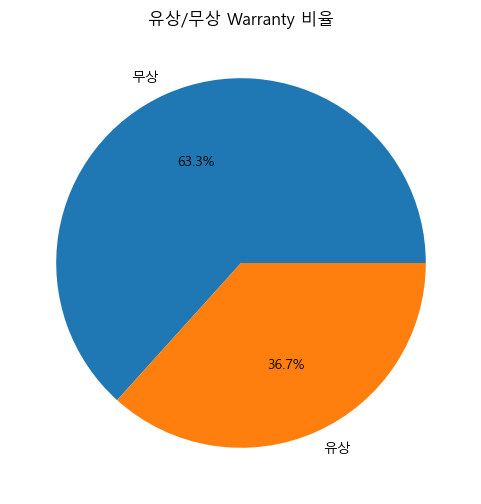

In [92]:
# 데이터프레임의 '유상/무상' 열에서 값의 카운트
warranty = df_total['유상/무상'].value_counts()

# 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(warranty, labels=warranty.index, autopct='%1.1f%%')
plt.title('유상/무상 Warranty 비율')
plt.show()